# **과제: 차원 축소 실습 및 시각화**



### **차원축소 실습**
1. 코드의 과정을 이해하고 주석 및 빈칸을 채워주세요
2. 최적의 주성분 또는 latent space를 정해서 차원축소를 진행하고 그 이유를 서술해주세요


## PCA

원하는 분산 설명 비율을 정하고 시각화를 진행해 필요한 주성분 개수를 정해봅시다!

In [3]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [8]:
digits = load_digits()
X = digits.data
y = digits.target

In [14]:
X.shape

(1797, 64)

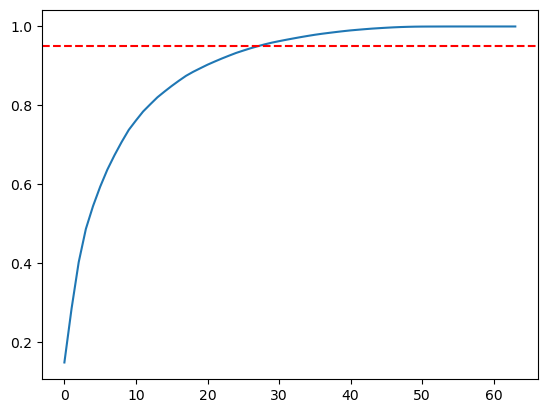

In [28]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

##1. 각 열에 대해서 데이터의 평균을 빼줌으로써 정규화 진행
X_mean=X-np.mean(X,axis=0)

##2. 주성분 추출을 위한 특잇값 분해 진행
U,S,Vt=np.linalg.svd(X_mean)

#print(S)
# S의 대각성분만 일차원으로 배열되어있음

#print(np.diag(S))
# 원래대로 복원할려면 이렇게 해야됨

##3. Vt의 전치행렬의 열방향이 주성분
principle_components=Vt.T

##4. 주성분을 몇개까지 설정할지 알기위해 각 주성분이 전체 분산에서 차지하는 비율 계산
explained_variance = (S ** 2) / (X.shape[0] - 1)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
cumsum = np.cumsum(explained_variance_ratio)

plt.plot(cumsum)

##5.원하는 분산 설명 비율을 y의 값으로 작성해주세요
plt.axhline(y=0.95, color="r", linestyle="--", label="Threshold")


In [34]:
print(np.diag(S))

[[5.67006567e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.42251854e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.04630594e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.53055082e-14
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.53055082e-14 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.49584828e-14]]


In [32]:
Vt.shape

(64, 64)

In [38]:
cumsum.shape

(64,)

In [43]:
print(X_mean)

[[ 0.         -0.30383973 -0.20478575 ... -6.7640512  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -5.20478575 ...  3.2359488  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -5.20478575 ...  9.2359488   6.93210907
  -0.36449638]
 ...
 [ 0.         -0.30383973 -4.20478575 ... -0.7640512  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973 -3.20478575 ...  5.2359488  -2.06789093
  -0.36449638]
 [ 0.         -0.30383973  4.79521425 ...  5.2359488  -1.06789093
  -0.36449638]]


In [45]:
X_mean.shape

(1797, 64)

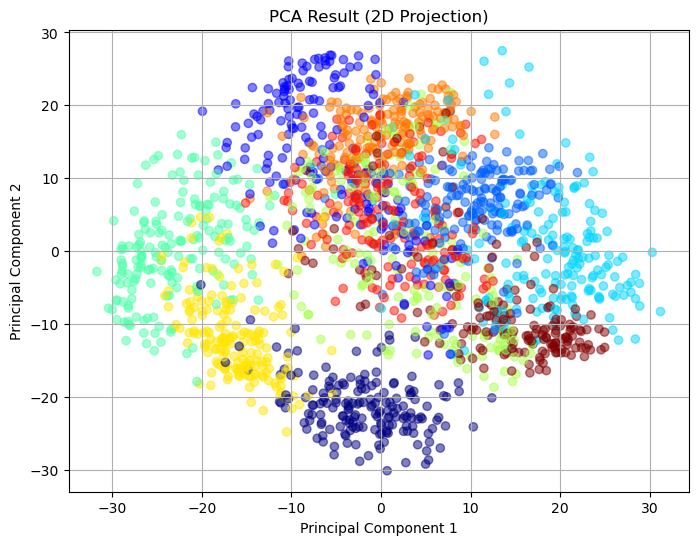

In [40]:
##6. 분산 설명 비율을 만족하는 주성분 개수까지 eigen vector를 잘라봅시다
principle_components= Vt[:np.argmax(cumsum>=0.95)].T

##7. 정규화시킨 데이터를 주성분에 사영(principal_components의 노름 크기가 1이기 때문에)
X_pca=np.dot(X_mean,principle_components)

##8. 2차원 시각화이지만, 원하신다면 변형하셔도 됩니다.
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=y, cmap="jet", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result (2D Projection)")
plt.grid(True)
plt.show()

문제. PCA에서는 어떤 주성분을 사용하셨나요? 그리고 그 이유는 뭔가요?

답. S행렬에서 분산이 큰 순으로 주성분을 사용했다. 왜냐하면 분산이 클수록 데이터의 정보를 더 많이 담기 때문이다. 

LDA

In [51]:
##1. 데이터 x 정규화
X_scaled = X-np.mean(X)
X_scaled.shape

(1797, 64)

In [53]:
y.shape

(1797,)

In [57]:
##2. label별로 특성별 평균을 구한다.
class_labels = np.unique(y)
mean_vectors = [np.mean(X_scaled[y == label], axis=0) for label in class_labels]
mean_vectors = np.array(mean_vectors)
mean_vectors.shape

(10, 64)

In [69]:
a=[zip(class_labels, mean_vectors)]
print(a)

In [71]:
##3. 클래스 내 분산 구하기
S_W = np.zeros((X.shape[1], X.shape[1]))
for label, mean_vec in zip(class_labels, mean_vectors):
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for row in X_scaled[y == label]:
        row = row.reshape(-1, 1)
        mean_vec = mean_vec.reshape(-1, 1)
        class_scatter += (row - mean_vec) @ (row - mean_vec).T
    S_W += class_scatter

##4. 클래스 간 분산 구하기
overall_mean = np.mean(X_scaled, axis=0).reshape(-1, 1)
S_B = np.zeros((X.shape[1], X.shape[1]))
for label, mean_vec in zip(class_labels, mean_vectors):
    mean_vec = mean_vec.reshape(-1, 1)
    n = X_scaled[y == label].shape[0]
    S_B += n * (mean_vec - overall_mean) @ (mean_vec - overall_mean).T

##5. S_B와 S_W를 가지고 고윳값, 고유벡터 계산
U, S, Vt = np.linalg.svd(S_W)
S_inv = np.diag(1 / S)
S_W_inv = Vt.T @ S_inv @ U.T

M = S_W_inv @ S_B
eigenvalues, eigenvectors = np.linalg.eig(M)


idx = np.argsort(-eigenvalues.real)
eigenvalues = eigenvalues[idx].real
eigenvectors = eigenvectors[:, idx].real

##6. 구한 고윳값을 이용하여 분산 설명 비율 구하기
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

##5.원하는 분산 설명 비율을 cumulative_variance의 조건식에 작성해주세요
n_components = np.argmax(cumulative_variance >=0.95) + 1
print(f"선택된 최적의 n_components: {n_components}")

선택된 최적의 n_components: 8


In [75]:
print(eigenvalues)

[ 7.58463461e+00  4.79096502e+00  4.44981352e+00  3.06159134e+00
  2.17770767e+00  1.72240766e+00  1.13069632e+00  7.69315261e-01
  5.46349031e-01  1.68821168e-15  1.59284602e-15  1.11556397e-15
  1.11556397e-15  9.56139784e-16  6.47116268e-16  4.60125811e-16
  4.60125811e-16  4.13294435e-16  4.13294435e-16  3.86328144e-16
  3.38273642e-16  3.38273642e-16  1.80117494e-16  8.77941091e-17
  8.77941091e-17  7.36139050e-17  7.36139050e-17  7.03646334e-17
  2.29250078e-17  1.59196542e-17  1.59196542e-17  1.57558584e-32
 -1.68197055e-31 -7.18928846e-18 -7.18928846e-18 -8.56723855e-18
 -8.56723855e-18 -3.84564661e-17 -3.84564661e-17 -8.31752424e-17
 -8.31752424e-17 -9.03759469e-17 -9.03759469e-17 -1.56818982e-16
 -2.31659569e-16 -2.31659569e-16 -2.52477155e-16 -2.57167372e-16
 -2.57167372e-16 -4.46797056e-16 -4.46797056e-16 -5.78921204e-16
 -5.78921204e-16 -6.07207319e-16 -6.07207319e-16 -7.43533119e-16
 -7.43533119e-16 -1.06020296e-15 -1.06020296e-15 -1.35375838e-15
 -1.35375838e-15 -2.50685

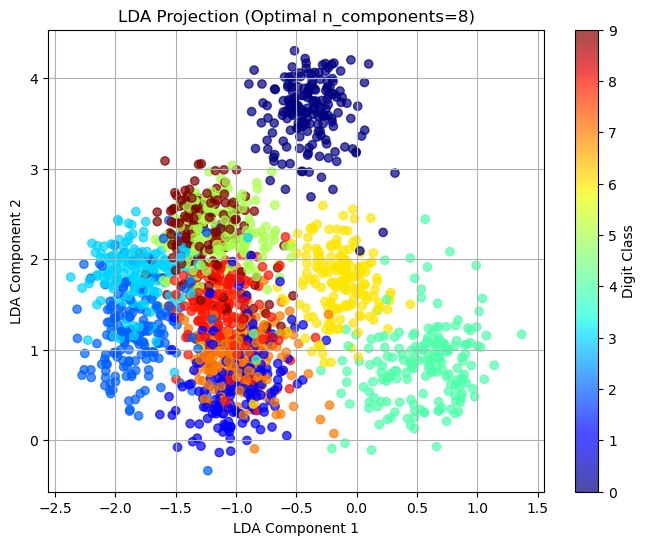

In [73]:
##6.분산 설명 비율을 만족하는 n_components까지 eigenvector를 자를 수 있도록 빈칸에 알맞게 작성해주세요
W_lda = eigenvectors[:, :8]
X_lda = X_scaled @ W_lda


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap="jet", alpha=0.7)
plt.colorbar(scatter, label="Digit Class")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title(f"LDA Projection (Optimal n_components={n_components})")
plt.grid()
plt.show()

Autoencoder

In [80]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset


##1. StandardScaler를 이용하여 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)


dataset = TensorDataset(X_tensor, y_tensor)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

##2. Autoencoder구조 생성
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=2):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, latent_dim)
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon, z

##3. autoencoder 모델 기반 loss 측정 방법 및 최적화 방법 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(latent_dim=2).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

문제. LDA에서는 어떤 주성분을 사용하셨나요? 그리고 그 이유는 뭔가요?

답. 고윳값이 큰 주성분을 사용했다. 왜냐하면 차원 축소의 목적상 주성분의 갯수를 최소화해야하는데 클래스 간 분산이 커지고 클래스 내 분산이 작아지도록 하는 비중을 의미하기 때문이다.

Autoencoder-분류기를 통한 성능 평가

Latent Dim: 3, Accuracy: 0.8089
Latent Dim: 4, Accuracy: 0.8117
Latent Dim: 8, Accuracy: 0.6614
Latent Dim: 16, Accuracy: 0.6906


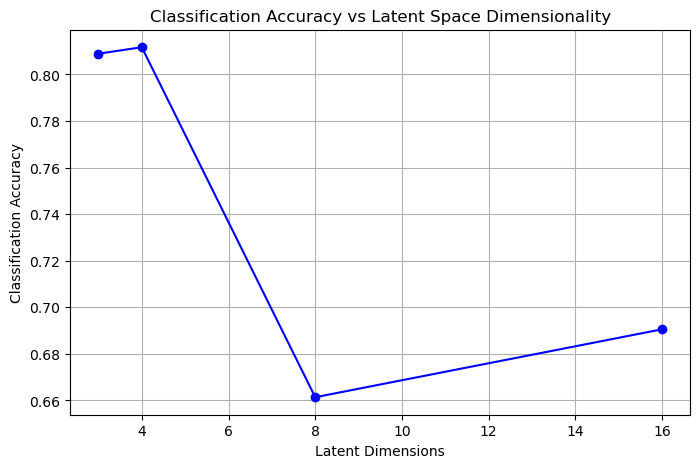

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##원하는 latent_dims로 실험해보세요!!
latent_dims = [3,4,8,16]  ##eg. latent_dims[3,4]
accuracies = []

##learning rate 조절하셔도 됩니다
for dim in latent_dims:
    model = Autoencoder(latent_dim=dim).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    accuracy=0

##epoch 조절하셔도 됩니다
    for i in range(0,10):
      num_epochs = 20
      for epoch in range(num_epochs):
          for X_batch, _ in data_loader:
              X_batch = X_batch.to(device)
              recon, _ = model(X_batch)
              loss = criterion(recon, X_batch)

              optimizer.zero_grad()
              loss.backward()
              optimizer.step()


      X_encoded = []
      y_labels = []
      with torch.no_grad():
          for X_batch, y_batch in data_loader:
              X_batch = X_batch.to(device)
              _, z = model(X_batch)
              X_encoded.append(z.cpu().numpy())
              y_labels.append(y_batch.numpy())
      X_encoded = np.vstack(X_encoded)
      y_labels = np.hstack(y_labels)
       

      ##분류기로 성능 평가를 진행해보겠습니다
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_labels, test_size=0.2, random_state=42)
      clf = RandomForestClassifier(n_estimators=100, random_state=42)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      accuracy += accuracy_score(y_test, y_pred)

    accuracies.append(accuracy/10)

    print(f"Latent Dim: {dim}, Accuracy: {accuracy/10:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(latent_dims, accuracies, marker="o", linestyle="-", color="b")
plt.xlabel("Latent Dimensions")
plt.ylabel("Classification Accuracy")
plt.title("Classification Accuracy vs Latent Space Dimensionality")
plt.grid()
plt.show()

Autoencoder 결과 시각화

원하는 latent space를 지정해서 시각화를 진행해봅시다

Epoch [1/20], Loss: 29.4853
Epoch [2/20], Loss: 27.2695
Epoch [3/20], Loss: 27.7005
Epoch [4/20], Loss: 26.9999
Epoch [5/20], Loss: 26.7318
Epoch [6/20], Loss: 26.5322
Epoch [7/20], Loss: 26.4613
Epoch [8/20], Loss: 26.1289
Epoch [9/20], Loss: 25.9100
Epoch [10/20], Loss: 26.0456
Epoch [11/20], Loss: 25.9298
Epoch [12/20], Loss: 26.0802
Epoch [13/20], Loss: 25.1878
Epoch [14/20], Loss: 25.4771
Epoch [15/20], Loss: 27.1160
Epoch [16/20], Loss: 24.7836
Epoch [17/20], Loss: 24.7482
Epoch [18/20], Loss: 24.3998
Epoch [19/20], Loss: 24.1305
Epoch [20/20], Loss: 23.9463


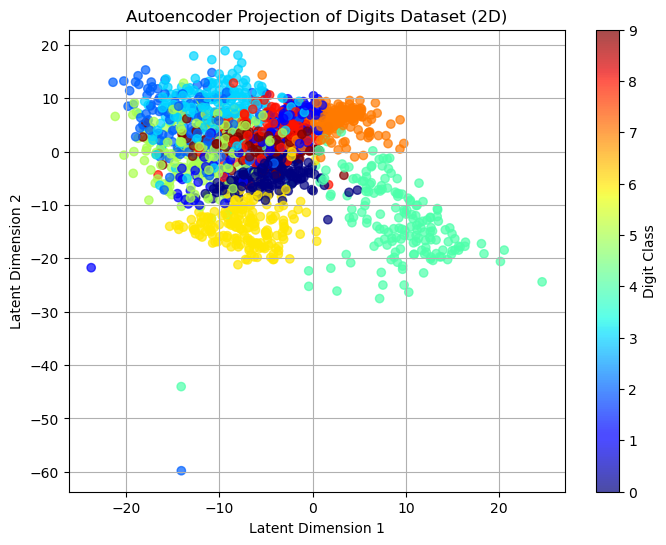

In [104]:
model = Autoencoder(latent_dim=4).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 20
for epoch in range(num_epochs):
    total_loss = 0
    for X_batch, _ in data_loader:
        X_batch = X_batch.to(device)
        recon, _ = model(X_batch)
        loss = criterion(recon, X_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

X_encoded = []
y_labels = []

with torch.no_grad():
    for X_batch, y_batch in data_loader:
        X_batch = X_batch.to(device)
        _, z = model(X_batch)
        X_encoded.append(z.cpu().numpy())
        y_labels.append(y_batch.numpy())

X_encoded = np.vstack(X_encoded)
y_labels = np.hstack(y_labels)


plt.figure(figsize=(8, 6))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y_labels, cmap="jet", alpha=0.7)
plt.colorbar(label="Digit Class")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Autoencoder Projection of Digits Dataset (2D)")
plt.grid()
plt.show()

문제. Autoencoder에서는 어떤 latent space를 사용하셨나요? 그리고 그 이유는 뭔가요?

답. 앞선 결과에서 latent space=4로 했을 때 accuracy가 제일 높아서

###**T-SNE를 이용한 시각화**
PCA와 t-SNE의 차원 축소 결과를 시각화하고 비교해보세요. 답 작성란은 아래에 있습니다:)

In [107]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd


data_digit= datasets.load_digits()

df_digit = pd.DataFrame(data = data_digit['data'], columns=data_digit['feature_names'])
label_digit = data_digit['target']

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tsne = TSNE(n_components=2)

df_digit_tsne=pd.DataFrame(data=tsne.fit_transform(df_digit),columns=["col1","col2"])
df_digit_tsne["label"]=label_digit

scaler=StandardScaler()
df_digit_scaled=pd.DataFrame(data=scaler.fit_transform(df_digit))

pca=PCA(n_components=2)
df_digit_pca=pd.DataFrame(data=pca.fit_transform(df_digit_scaled),columns=["col1","col2"])


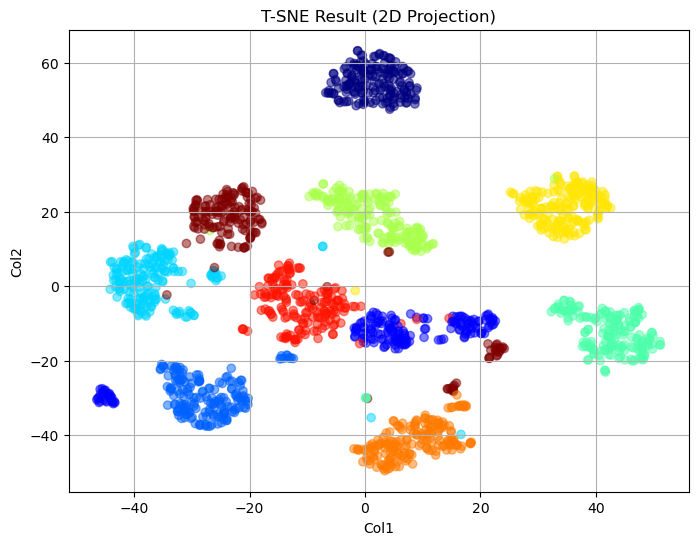

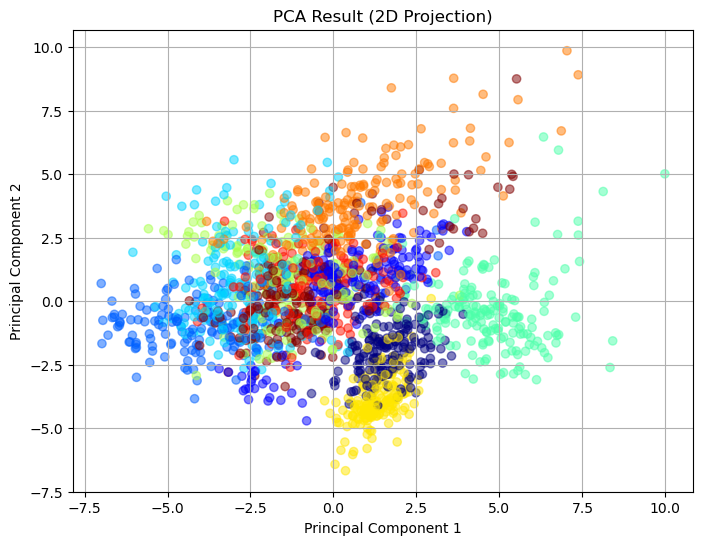

In [110]:
plt.figure(figsize=(8, 6))
plt.scatter(df_digit_tsne['col1'], df_digit_tsne['col2'],  c=label_digit, cmap="jet", alpha=0.5)
plt.xlabel("Col1")
plt.ylabel("Col2")
plt.title("T-SNE Result (2D Projection)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df_digit_pca['col1'], df_digit_pca['col2'],  c=label_digit, cmap="jet", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result (2D Projection)")
plt.grid(True)
plt.show()

문제. 어떤 차원축소 기법이 더 좋은 시각화 결과를 냈는지, 이 이유가 무엇인지 서술하세요

답: SNE가 더 좋은 결과를 냈는데 PCA의 경우 선형 투영만 가능하여 비선형투영이 가능한 SNE가 더 좋은 결과를 낸 것 같다.